In [142]:
from IPython.display import HTML

HTML('''
<style>
 

/* Section header block */
.section-header {
    font-size: 24px;
    font-weight: 600;
    color: #e5e7eb;
    margin-top: 30px;
    margin-bottom: 10px;
}

/* Info Card */
.info-card {
    background:background:#fff
    color: #1f2937;
    padding: 18px;
    border-radius: 12px;
    border: 1px solid #e5e7eb;
    margin: 12px 0;
    font-family: Georgia, serif;
}

/* Highlight box */
.highlight-box {
    background: #fffbea;
    border-left: 6px solid #facc15;
    padding: 14px;
    border-radius: 6px;
    margin: 12px 0;
    color: #78350f;
    font-style: italic;
}

/* Pillar Cards Container */
.pillars {
    display: flex;
    gap: 14px;
    flex-wrap: wrap;
    margin-top: 10px;
}
.pillar {
    flex: 1;
    background: white;
    border-radius: 10px;
    border: 1px solid #e5e7eb;
    padding: 16px;
    box-shadow: 0 2px 6px rgba(0,0,0,0.06);
    font-family: Georgia, serif;
}

/* Progress Box */
.progress-box {
    background: #e0f2fe;
    border-left: 6px solid #0284c7;
    padding: 14px;
    border-radius: 6px;
    color: #0c4a6e;
    margin: 14px 0;
    font-family: Arial, sans-serif;
}

/* List Styling */
ul {
    color: #1f2937;
    line-height: 1.6;
    margin-left: 20px;
}
</style>
''')

<div class="info-card" style="margin-top:10px; background:#fff; padding:20px;">
  <h2 style="margin:0;color:#0f172a;">DA5401 A6: Imputation via Regression for Missing Data</h2>
  
  <div style="margin-top:6px;margin-bottom:10px;font-size:15px;color:#1f2937;">
    <b>Name:</b> Shivam Tiwari &nbsp;&nbsp; | &nbsp;&nbsp; 
    <b>Roll No:</b> DA25C019
  </div>

  <div style="background:#f9fafb;border-left:4px solid #2563eb;padding:10px 14px;border-radius:6px; color:#8b8b8b;">
    <b style="color:#000;">🎯 Objective:</b> This notebook addresses the common problem of 
    <b>missing data</b> in a credit risk assessment project. <br>
    We will explore and compare four different strategies for handling missing data in the 
    <b>UCI Credit Card Default Clients Dataset</b>.
  </div>

  <h3 style="margin-top:16px;color:#111827;">🧩 The Four Strategies</h3>
  <ol style="margin-left:22px;line-height:1.65;color:#1f2937;">
    <li><b>Simple Imputation (Baseline):</b> Filling missing values with the column median.</li>
    <li><b>Regression Imputation (Linear):</b> Predicting missing values using a linear regression model based on other features.</li>
    <li><b>Regression Imputation (Non-Linear):</b> Predicting missing values using a non-linear model (K-Nearest Neighbors Regression).</li>
    <li><b>Listwise Deletion:</b> Removing all rows that contain any missing values.</li>
  </ol>

  <div class="highlight-box" style="margin-top:12px; color:#000;">
    The effectiveness of each method will be evaluated by training a <b>Logistic Regression classifier</b> 
    on the resulting datasets and comparing their performance metrics.
  </div>
</div>

# Part A: Data Preprocessing and Imputation


In [143]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

sns.set_style("whitegrid")


## 1. Load and Prepare Data 

First, we load the dataset and prepare it. This includes renaming the target column for clarity and artificially introducing "Missing At Random" (MAR) values into two numerical columns to simulate a real-world scenario with a missing data problem.


In [144]:
df_original = pd.read_csv('UCI_Credit_Card.csv')

In [ ]:
from IPython.display import display, HTML
import io

# Prepare data
shape = df_original.shape
sample_html = df_original.head().to_html(classes='summary-table', index=False, border=0)
describe_html = df_original.describe().to_html(classes='summary-table', border=0)

# .info() capture
buf = io.StringIO()
df_original.info(buf=buf)
info_text = buf.getvalue().replace("\n", "<br>").replace(" ", "&nbsp;")

# Display full styled HTML
display(HTML(f'''
<style>
/* Ensure visibility on dark notebooks */
.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}

/* Info card wrap */
.info-card {{
    background:#fff;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
}}
</style>

<div class="info-card" style ="background: #fff;">
  <h2 style="margin-top:0; color:#0f172a;">📊 Dataset Summary</h2>

  <ul style="list-style-type: disc; margin-left: 20px; color: #1f2937; line-height:1.6;">
    <li><b>Shape:</b> {shape[0]:,} rows × {shape[1]} columns</li>
    <li><b>Total Missing Values:</b> {df_original.isnull().sum().sum():,}</li>
  </ul>

  <h3 style="margin-top:20px; color:#0f172a;">🔍 First 5 Rows</h3>
  <div style="overflow-x: auto; margin-bottom:20px;">{sample_html}</div>

  <h3 style="margin-top:20px; color:#0f172a;">📈 Statistical Summary</h3>
  <div style="overflow-x: auto; margin-bottom:20px;">{describe_html}</div>

  <h3 style="margin-top:20px; color:#0f172a;">📋 Dataset Info</h3>
  <div style="
    font-family: monospace;
    font-size: 13px;
    color: #111827;
    background: #f9fafb;
    border: 1px solid #e5e7eb;
    border-radius: 8px;
    padding: 10px;
    overflow-x: auto;
    white-space: pre;
  ">
    {info_text}
  </div>
</div>
'''))

In [ ]:
from IPython.display import display, HTML
import pandas as pd

# Ensure df_original exists
cols = df_original.columns.tolist()

# Check missing values
missing = df_original.isnull().sum()
missing = missing[missing > 0]
missing_html = (missing.to_frame('Missing Count')
                      .to_html(classes='summary-table', border=0))

# Determine target column
if 'default.payment.next.month' in cols:
    target_col = 'default.payment.next.month'
elif 'default payment next month' in cols:
    target_col = 'default payment next month'
else:
    target_col = cols[-1]

# Target value distribution
target_dist = df_original[target_col].value_counts().to_frame('Count')
target_dist.index.name = target_col
target_dist_html = target_dist.to_html(classes='summary-table', border=0)

# Column display HTML
cols_html = ', '.join(f"<code>{col}</code>" for col in cols)

# Final render
display(HTML(f'''
<style>
.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}
.info-card {{
    background:#fff;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
}}
</style>

<div class="info-card">
  <h2 style="margin-top:0; color:#0f172a;">🧾 Column & Target Overview</h2>

  <h4 style="color:#0f172a;">🔠 Column Names</h4>
  <div style="line-height:1.6; color:#1f2937;">{cols_html}</div>

  <h4 style="margin-top:20px; color:#0f172a;">🩹 Missing Values</h4>
  {missing_html if not missing.empty else "<p style='color:#059669;'>✅ No missing values in original dataset.</p>"}

  <h4 style="margin-top:20px; color:#0f172a;">🎯 Target Variable</h4>
  <p style="color:#1f2937;"><b>Detected:</b> <code>{target_col}</code></p>

  <h4 style="color:#0f172a;">📊 Target Class Distribution</h4>
  <div style="overflow-x:auto;">{target_dist_html}</div>
</div>
'''))

,Count
default.payment.next.month,
0,23364
1,6636


In [147]:
# Clean up column names for easier access
df_original.rename(columns={'default.payment.next.month': 'DEFAULT'}, inplace=True)
# Drop the ID column as it's not a useful feature
df_original.drop('ID', axis=1, inplace=True)

In [148]:
# Artificially introduce 8% missing values in 'AGE' and 'BILL_AMT1' columns
SEED = 42
np.random.seed(SEED)

df_with_missing = df_original.copy()
cols_to_nullify = ['AGE', 'BILL_AMT1']
percentage_to_nullify = 0.08

In [ ]:
from IPython.display import display, HTML
import numpy as np

# Simulate missing values (as per your logic)
for col in cols_to_nullify:
    num_to_nullify = int(percentage_to_nullify * len(df_with_missing))
    missing_indices = np.random.choice(df_with_missing.index, num_to_nullify, replace=False)
    df_with_missing.loc[missing_indices, col] = np.nan

# Prepare outputs
null_summary = df_with_missing[cols_to_nullify].isnull().sum().to_frame('Missing Count')
null_summary.index.name = 'Column'
null_html = null_summary.to_html(classes='summary-table', border=0)

df_head_html = df_with_missing.head().to_html(classes='summary-table', index=False, border=0)

# Display styled HTML
display(HTML(f'''
<style>
.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}
.info-card {{
    background:#fff;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
}}
</style>

<div class="info-card">
  <h2 style="margin-top:0; color:#0f172a;">🧪 Missing Data Simulation (MAR)</h2>

  <p style="color:#1f2937;">
    Simulated <b>{int(percentage_to_nullify * 100)}%</b> missing values for the following columns:
    {' , '.join(f"<code>{col}</code>" for col in cols_to_nullify)}.
  </p>

  <h4 style="margin-top:20px; color:#0f172a;">🧾 Missing Value Verification</h4>
  <div style="overflow-x:auto;">{null_html}</div>

  <h4 style="margin-top:20px; color:#0f172a;">👀 Sample of Modified Data</h4>
  <div style="overflow-x:auto;">{df_head_html}</div>
</div>
'''))

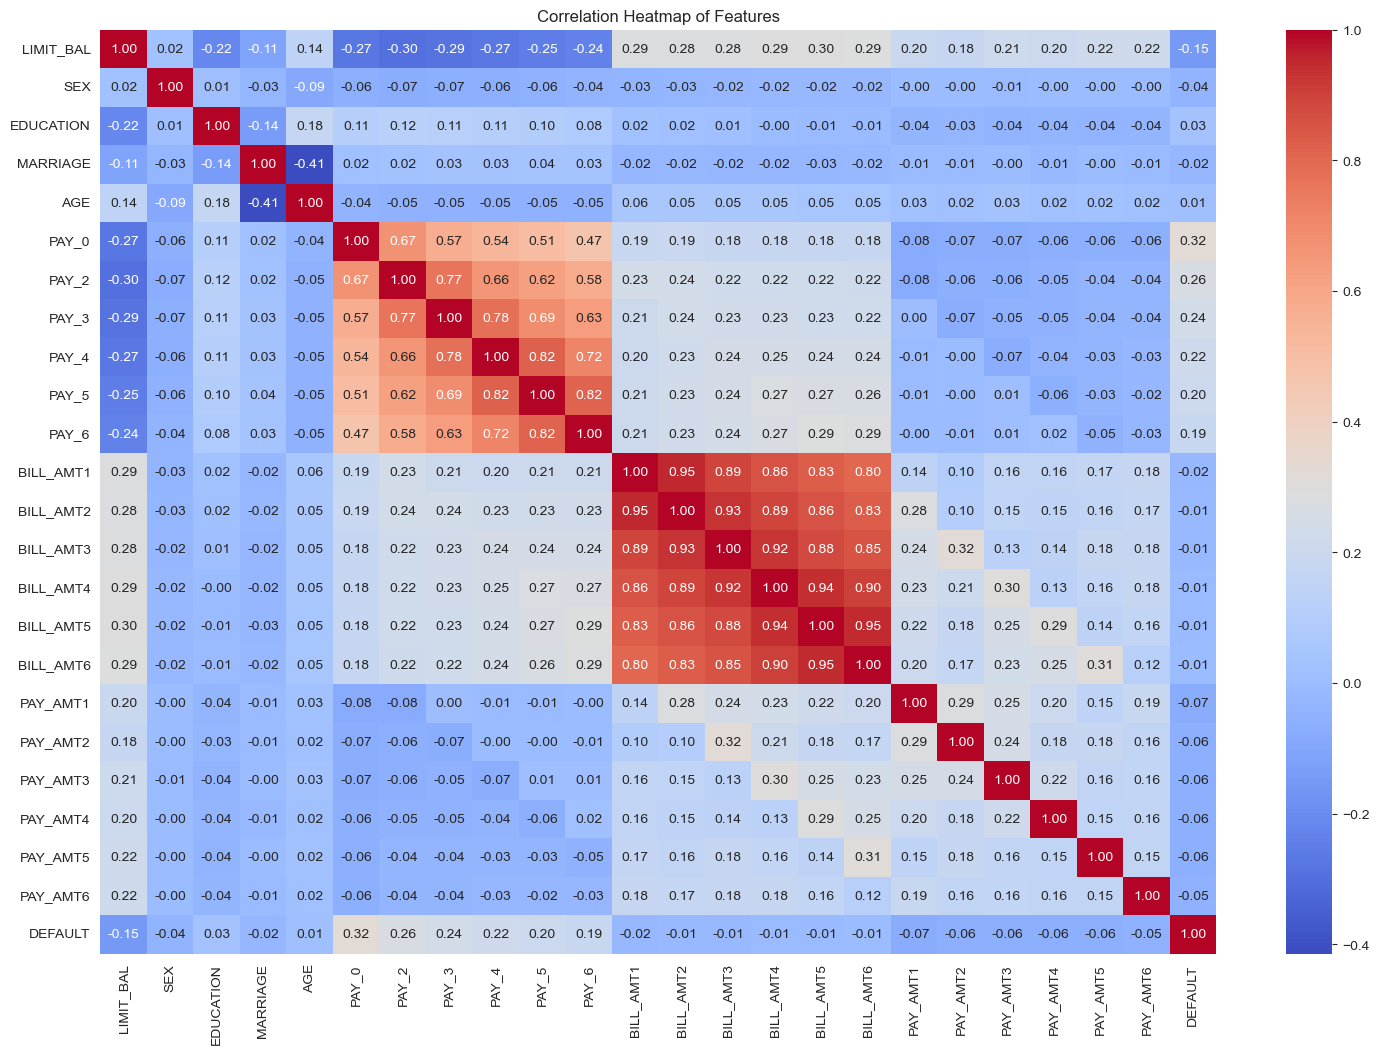

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import HTML, display

# Compute correlation matrix
corr_matrix = df_original.corr(numeric_only=True)
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature A', 'Feature B', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature A'] != corr_pairs['Feature B']]
corr_pairs['AbsCorr'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values('AbsCorr', ascending=False).drop_duplicates(subset=['Correlation'])

# Strength interpretation
def interpret_corr(c):
    a = abs(c)
    if a >= 0.7: return "very strong"
    if a >= 0.5: return "strong"
    if a >= 0.3: return "moderate"
    if a >= 0.1: return "weak"
    return "very weak"

# Top 8 correlation insights
top_corrs = corr_pairs.head(8)
insight_bullets = ""
for _, row in top_corrs.iterrows():
    strength = interpret_corr(row['Correlation'])
    trend = "positive" if row['Correlation'] > 0 else "negative"
    insight_bullets += f"<li><b>{row['Feature A']}</b> ↔ <b>{row['Feature B']}</b>: {strength} {trend} correlation (ρ = {row['Correlation']:.2f})</li>"

# Styled insight block
display(HTML(f"""
<style>
.insight-box {{
    background:#fff;
    padding: 16px;
    border-radius: 12px;
    border: 1px solid #e5e7eb;
    margin: 16px 0;
    color: #1f2937;
}}
.insight-box ul {{
    margin-left: 18px;
    line-height: 1.6;
}}
</style>
<div class="insight-box">
  <h3 style="margin-top:0;">📌 Correlation Insights</h3>
  <p>The strongest feature relationships found in the dataset are summarized below:</p>
  <ul>
    {insight_bullets}
  </ul>
</div>
"""))

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

### Analysis of Feature Correlation
This heatmap visualizes the correlation coefficients between all the features in the dataset. The key takeaway is in the row and column corresponding to the (`AGE`) variable.

- Weak Correlation with Predictors: We can observe that (`AGE`) has a very weak linear relationship with most other features. For example, its correlation with (`LIMIT_BAL`) is only 0.15, and with the (`BILL_AMT`) columns, it is even lower (around 0.05).

- Implication for Imputation: Regression imputation works best when the variable to be imputed has a strong correlation with other features. Since (`AGE`) is not strongly predictable from the other financial variables, the linear and non-linear regression models struggled to make accurate predictions for the missing values.

**Conclusion:** This lack of a strong predictive signal is the primary reason why we anticipate that the more complex regression imputation models may not offer a significant improvement over simple median imputation. The models have very little information to learn from to accurately estimate a person's age.

## 2. Imputation Strategy 1: Simple Imputation (Baseline) 

For our baseline, we create Dataset A by filling the missing values with the median of their respective columns.



In [151]:
# Separate features and target
X = df_with_missing.drop('DEFAULT', axis=1)
y = df_with_missing['DEFAULT']

# Split before imputation (keep missing values)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [152]:
imp = SimpleImputer(strategy='median')
X_train_A = pd.DataFrame(imp.fit_transform(X_train), columns=X_train.columns)
X_test_A  = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

# Combine features and target for final dataset
df_A = pd.concat([X_train_A.assign(target=y_train.values),
                  X_test_A.assign(target=y_test.values)])
df_A.rename(columns={'target': 'DEFAULT'}, inplace=True)

In [153]:
from IPython.display import display, HTML

# Check missing values in the specified columns
missing_check = df_A[cols_to_nullify].isnull().sum()
missing_check = missing_check[missing_check > 0]

# Render styled output
display(HTML(f"""
<style>
.verification-card {{
    background: #fefefe;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
    color: #1f2937;
}}
.success-box {{
    background: #ecfdf5;
    border-left: 6px solid #10b981;
    color: #065f46;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
.warning-box {{
    background: #fffbea;
    border-left: 6px solid #facc15;
    color: #78350f;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
table.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}
</style>

<div class="verification-card">
  <h3 style="margin-top:0;">🔎 Verification: Missing Values after Median Imputation</h3>

  {"<div class='success-box'>✅ No missing values found in the selected columns. Median imputation successful.</div>" 
   if missing_check.empty 
   else "<div class='warning-box'>⚠️ Some missing values still remain. Please verify imputation logic.</div>"}

  {""
   if missing_check.empty 
   else missing_check.to_frame("Remaining NaNs").to_html(classes='summary-table', border=0)}
</div>
"""))

### Why is the median often preferred over the mean for imputation?

The median is generally preferred over the mean for imputation, especially when dealing with skewed data or data containing outliers. The mean is highly sensitive to extreme values, which can pull its value and result in imputing an unrepresentative number. The median, being the 50th percentile, is robust to outliers and provides a better measure of central tendency for skewed distributions, thus leading to more stable and realistic imputations.

## 3. Imputation Strategy 2: Regression Imputation 

Here, we create Dataset B. We will impute the missing values in the AGE column by training a Linear Regression model on all other features. The other column with missing data (`BILL_AMT1`) is filled with its median to allow it to be used as a predictor.

In [154]:
from IPython.display import HTML, display
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import pandas as pd

# ---------- Step 1: Setup ----------
target_col = 'AGE'
predictor_col = 'BILL_AMT1'  # used for median fill
predictors = [c for c in X_train.columns if c != target_col]

# ---------- Step 2: Median Imputation for BILL_AMT1 ----------
imp = SimpleImputer(strategy='median')
X_train[predictor_col] = imp.fit_transform(X_train[[predictor_col]])
X_test[predictor_col]  = imp.transform(X_test[[predictor_col]])

# ---------- Step 3: Linear Regression Imputation for AGE ----------
mask_non_missing_train = ~X_train[target_col].isna()
mask_missing_train     = X_train[target_col].isna()
mask_missing_test      = X_test[target_col].isna()

lr_imputer = LinearRegression()
lr_imputer.fit(
    X_train.loc[mask_non_missing_train, predictors],
    X_train.loc[mask_non_missing_train, target_col]
)

# Predict for TRAIN (safe check)
if mask_missing_train.sum() > 0:
    X_train.loc[mask_missing_train, target_col] = lr_imputer.predict(
        X_train.loc[mask_missing_train, predictors]
    )

# Predict for TEST (safe check)
if mask_missing_test.sum() > 0:
    X_test.loc[mask_missing_test, target_col] = lr_imputer.predict(
        X_test.loc[mask_missing_test, predictors]
    )

# ---------- Step 4: Recombine Datasets ----------
df_B = pd.concat([X_train.assign(target=y_train.values),
                  X_test.assign(target=y_test.values)])
df_B.rename(columns={'target': 'DEFAULT'}, inplace=True)

# ---------- Step 5: Verification ----------
missing_summary = pd.DataFrame({
    'Train': X_train[cols_to_nullify].isna().sum(),
    'Test': X_test[cols_to_nullify].isna().sum()
})
has_missing = missing_summary.values.sum() > 0
missing_html = missing_summary.to_html(classes='summary-table', border=0)

# ---------- Step 6: Display Styled Output ----------
display(HTML(f"""
<style>
.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}
.verification-card {{
    background: #fefefe;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
    color: #1f2937;
}}
.success-box {{
    background: #ecfdf5;
    border-left: 6px solid #10b981;
    color: #065f46;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
.warning-box {{
    background: #fffbea;
    border-left: 6px solid #facc15;
    color: #78350f;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
</style>

<div class="verification-card">
  <h2 style="margin-top:0;">📉 Dataset B: Linear Regression Imputation</h2>

  <p>Target column for imputation: <code>{target_col}</code><br>
     Predictors used: <code>{', '.join(predictors)}</code>
  </p>

  {"<div class='success-box'>✅ No missing values found after linear regression imputation. All nulls successfully handled.</div>" 
    if not has_missing else 
   "<div class='warning-box'>⚠️ Some missing values still remain. Please check columns individually.</div>"}

  <h4 style="margin-top:20px;">📊 Missing Values (Post-Imputation)</h4>
  <div style="overflow-x:auto;">{missing_html}</div>
</div>
"""))

,Train,Test
AGE,0,0
BILL_AMT1,0,0


### What is the underlying assumption of this method?

 The core assumption of regression imputation is that the data is Missing At Random (MAR). This means that the probability of a value being missing is dependent on other observed variables in the dataset, but not on the missing value itself. For example, under MAR, a person's 'AGE' might be missing because of their 'LIMIT_BAL' (which we can see), but not because of their actual age. This assumption is what allows us to use the other columns to build a predictive model for the missing values.


## 4. Imputation Strategy 3: Regression Imputation (Non-Linear)

We now create **Dataset C** using a non-linear regression model (K-Nearest Neighbors Regression) to predict and fill the missing values in the `AGE` column. This approach can capture more complex relationships between the features than a simple linear model.

In [155]:
# Dataset C: Non-Linear Regression Imputation (KNN) 
target_col = 'AGE'
predictor_col = 'BILL_AMT1'
predictors = [c for c in X_train.columns if c != target_col]

# Fill BILL_AMT1 using median 
imp = SimpleImputer(strategy='median')
X_train[predictor_col] = imp.fit_transform(X_train[[predictor_col]])
X_test[predictor_col]  = imp.transform(X_test[[predictor_col]])

# Prepare masks for missing/non-missing AGE
mask_non_missing_train = ~X_train[target_col].isna()
mask_missing_train     = X_train[target_col].isna()
mask_missing_test      = X_test[target_col].isna()

# Train KNN regressor on TRAIN rows where AGE is not missing
knn_imputer = KNeighborsRegressor(n_neighbors=5)
knn_imputer.fit(
    X_train.loc[mask_non_missing_train, predictors],
    X_train.loc[mask_non_missing_train, target_col]
)

# Predict missing AGE values in TRAIN
if mask_missing_train.sum() > 0:
    X_train.loc[mask_missing_train, target_col] = knn_imputer.predict(
        X_train.loc[mask_missing_train, predictors]
    )

# Predict missing AGE values in TEST using the same trained imputer
if mask_missing_test.sum() > 0:
    X_test.loc[mask_missing_test, target_col] = knn_imputer.predict(
        X_test.loc[mask_missing_test, predictors]
    )

In [156]:
from IPython.display import display, HTML
import pandas as pd

# -------- Recombine X_train & X_test into df_C --------
df_C = pd.concat([
    X_train.assign(target=y_train.values),
    X_test.assign(target=y_test.values)
])
df_C.rename(columns={'target': 'DEFAULT'}, inplace=True)

# -------- Missing Value Check --------
missing_summary = pd.DataFrame({
    'Train': X_train[cols_to_nullify].isna().sum(),
    'Test': X_test[cols_to_nullify].isna().sum()
})
has_missing = missing_summary.values.sum() > 0
missing_html = missing_summary.to_html(classes='summary-table', border=0)

# -------- Styled HTML Output --------
display(HTML(f"""
<style>
.summary-table {{
    background: white;
    color: #1f2937;
    border-collapse: collapse;
    font-size: 14px;
    border: 1px solid #e5e7eb;
    border-radius: 6px;
    margin-bottom: 20px;
}}
.summary-table th {{
    background-color: #f3f4f6 !important;
    color: #111827 !important;
    padding: 8px;
    border: 1px solid #d1d5db;
    text-align: center;
}}
.summary-table td {{
    padding: 6px;
    border: 1px solid #e5e7eb;
    text-align: center;
}}
.verification-card {{
    background: #fefefe;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
    color: #1f2937;
}}
.success-box {{
    background: #ecfdf5;
    border-left: 6px solid #10b981;
    color: #065f46;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
.warning-box {{
    background: #fffbea;
    border-left: 6px solid #facc15;
    color: #78350f;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 8px;
}}
</style>

<div class="verification-card">
  <h2 style="margin-top:0;">📍 Dataset C: KNN Imputation</h2>

  {"<div class='success-box'>✅ No missing values found after KNN imputation. Dataset is clean.</div>" 
    if not has_missing else 
   "<div class='warning-box'>⚠️ Some missing values still remain after KNN imputation. Please verify columns.</div>"}

  <h4 style="margin-top:20px;">📊 Missing Values (Post-Imputation)</h4>
  <div style="overflow-x:auto;">{missing_html}</div>
</div>
"""))

,Train,Test
AGE,0,0
BILL_AMT1,0,0


# Part B: Model Training and Performance Assessment

Now, we will prepare the four final datasets and train a Logistic Regression classifier on each to evaluate the imputation strategies.

## 1. Data Split 

In [157]:
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

# ---------- Step 1: Listwise Deletion ----------
df_D = df_with_missing.dropna()

original_len = len(df_with_missing)
final_len = len(df_D)
pct_lost = 100 * (1 - final_len / original_len)

# ---------- Step 2: Collect Datasets ----------
datasets = {
    "A (Median)": df_A,
    "B (Linear Reg)": df_B,
    "C (Non-Linear Reg)": df_C,
    "D (Listwise Deletion)": df_D
}

# ---------- Step 3: Stratified Splits ----------
splits = {}
target_col = 'DEFAULT' 

for name, df in datasets.items():
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    splits[name] = (X_train, X_test, y_train, y_test)

# ---------- Step 4: Styled HTML Output ----------
display(HTML(f"""
<style>
.stat-box {{
    background: #fefefe;
    border: 1px solid #e5e7eb;
    border-radius: 12px;
    padding: 20px;
    margin: 20px 0;
    color: #1f2937;
}}
.stat-box ul {{
    margin-left: 20px;
    line-height: 1.6;
    color: #1f2937;
}}
.highlight {{
    font-weight: bold;
    color: #b91c1c;
}}
</style>

<div class="stat-box">
  <h2 style="margin-top:0;">🧹 Dataset D: Listwise Deletion Summary</h2>

  <ul>
    <li><b>Original Dataset Size:</b> {original_len:,} rows</li>
    <li><b>After Listwise Deletion:</b> {final_len:,} rows</li>
    <li><b>Percentage of Data Lost:</b> <span class="highlight">{pct_lost:.2f}%</span></li>
  </ul>

  <p style="margin-top:15px;">
    All datasets (A–D) have now been split into train/test sets using a stratified split to preserve class balance.
  </p>
</div>
"""))

 With our three imputed datasets (A, B, C) prepared, we also create a fourth dataset, **Dataset D**, by simply dropping all rows containing any missing values All four datasets are then split into The features of each dataset are standardized using `StandardScaler` to ensure that all features contribute equally to the mode .

## 2. Classifier Setup: Feature Standardization

In [158]:
# Scale the features for each dataset
scaled_splits = {}
for name, (X_train, X_test, y_train, y_test) in splits.items():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaled_splits[name] = (X_train_scaled, X_test_scaled, y_train, y_test)

## 3. Model Evaluation

Finally, we train a Logistic Regression classifier on each of the four datasets and evaluate its performance using a full classification report.



In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display, HTML
import pandas as pd

results = []
for name, (X_train_scaled, X_test_scaled, y_train, y_test) in scaled_splits.items():
    model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Dataset': name,
        'Accuracy': accuracy,
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-Score (1)': report['1']['f1-score']
    })

summary_df = pd.DataFrame(results)

# ============================
# Custom styling for dark mode
# ============================
css = """
<style>
    .metric-table {
        font-family: 'Segoe UI', sans-serif;
        border-collapse: collapse;
        width: 100%;
        margin: 20px 0;
    }
    .metric-table th, .metric-table td {
        border: 1px solid #444;
        padding: 10px 14px;
        text-align: center;
    }
    .metric-table th {
        background-color: #222;
        color: #f0f0f0;
    }
    .metric-table td {
        background-color: #1e1e1e;
        color: #ccc;
    }
    .metric-table tr.highlight td {
        background-color: #2e7d32 !important;
        color: #fff;
        font-weight: bold;
    }
    .summary-title {
        font-size: 24px;
        font-weight: 600;
        color: #78e2a0;
        margin: 30px 0 10px;
        padding-left: 5px;
        border-left: 5px solid #78e2a0;
    }
</style>
"""

# Identify best performers
highlight_rows = summary_df[['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-Score (1)']].idxmax()

# Generate HTML Table with highlight
table_html = '<div class="summary-title">📊 Logistic Regression Evaluation Summary</div>'
table_html += '<table class="metric-table">'
table_html += '<thead><tr>' + ''.join(f'<th>{col}</th>' for col in summary_df.columns) + '</tr></thead>'
table_html += '<tbody>'
for i, row in summary_df.iterrows():
    row_class = 'highlight' if i in highlight_rows.values else ''
    table_html += f'<tr class="{row_class}">' + ''.join(f'<td>{row[col]:.4f}' if isinstance(row[col], float) else f'<td>{row[col]}' for col in summary_df.columns) + '</td></tr>'
table_html += '</tbody></table>'

display(HTML(css + table_html))

# Part C: Comparative Analysis


Comparison of Imputed Values (first 10 samples that were missing):
   Median Imputation  Linear Regression  KNN Regression
0               33.0          40.718476       40.718476
1               23.0          29.575239       29.575239
2               37.0          42.849502       42.849502
3               35.0          34.333151       34.333151
4               39.0          41.074066       41.074066
5               43.0          42.183487       42.183487
6               39.0          33.039867       33.039867
7               29.0          38.808173       38.808173
8               37.0          40.174557       40.174557
9               30.0          30.819125       30.819125

Statistical Summary of the Values Imputed by Each Method:
       Median Imputation  Linear Regression  KNN Regression
count        2414.000000        2400.000000     2400.000000
mean           35.348799          35.574431       35.574431
std             8.944094           4.264957        4.264957
min            21

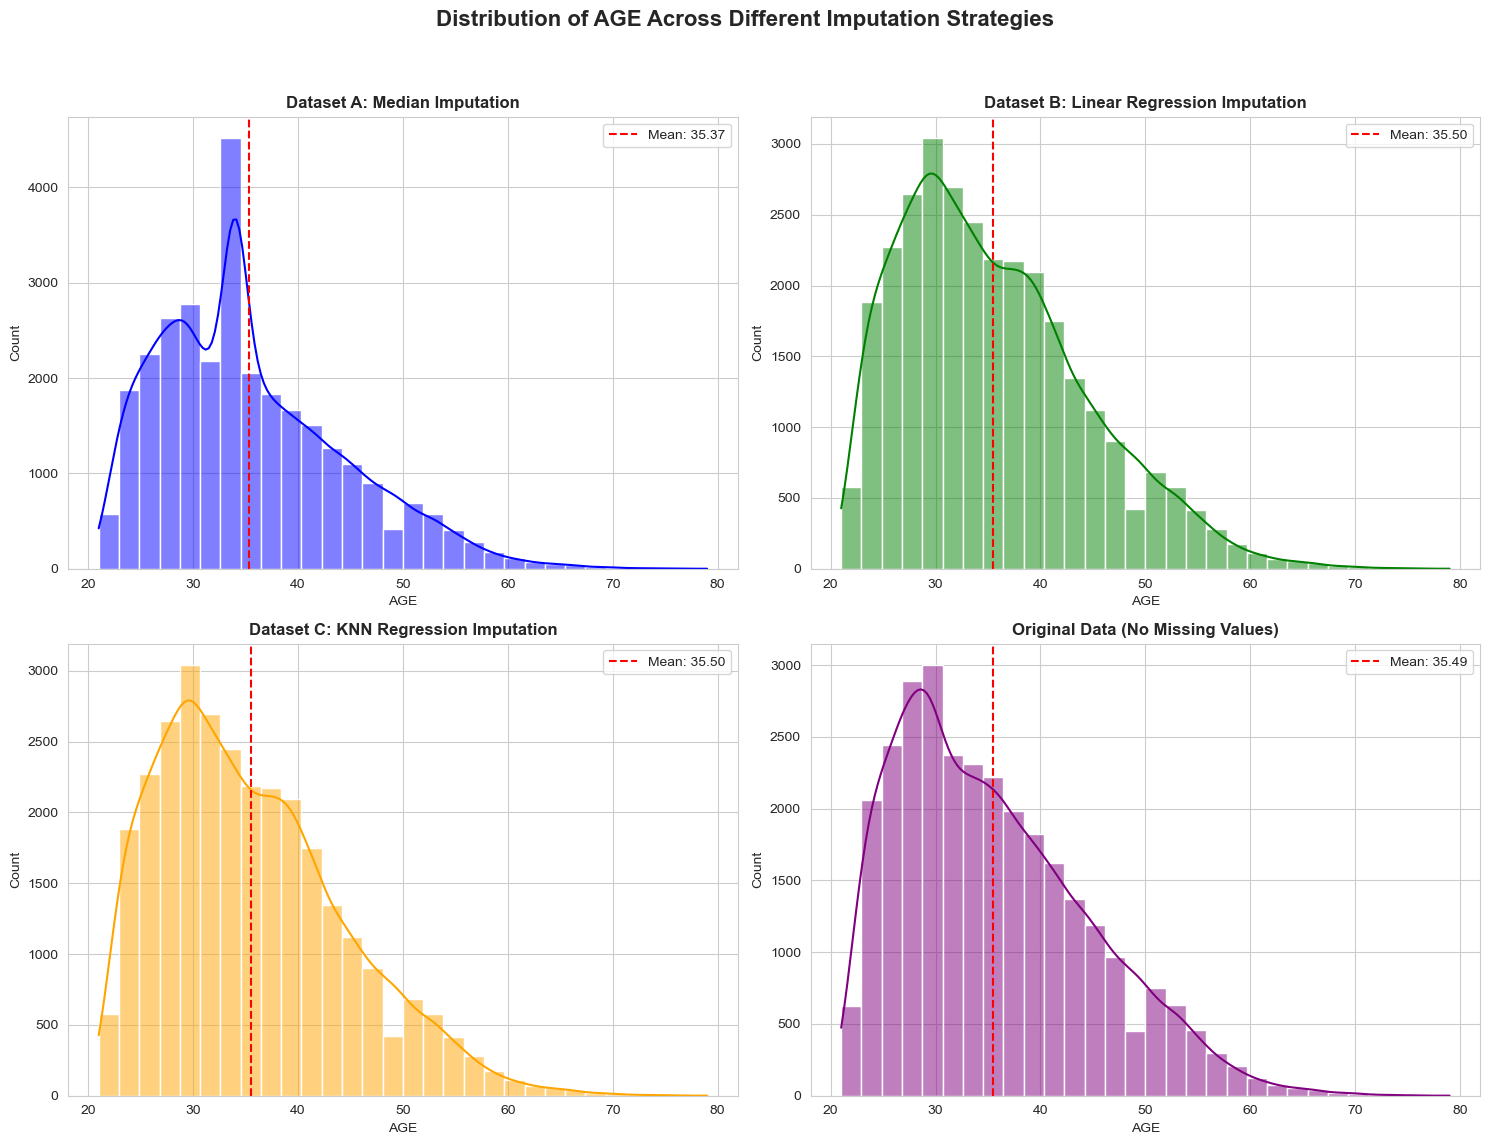

In [160]:
# This section provides a deeper look at the imputed 'AGE' values themselves,
target_impute_col = 'AGE'

# Create a mask to identify the rows where 'AGE' was originally missing
missing_mask = df_with_missing[target_impute_col].isnull()

# Compare the specific values that were imputed by each strategy for the same missing spots
comparison_df = pd.DataFrame({
    'Median Imputation': df_A.loc[missing_mask, target_impute_col].reset_index(drop=True),
    'Linear Regression': df_B.loc[missing_mask, target_impute_col].reset_index(drop=True),
    'KNN Regression': df_C.loc[missing_mask, target_impute_col].reset_index(drop=True)
})

print("\nComparison of Imputed Values (first 10 samples that were missing):")
print(comparison_df.head(10))

# Display a statistical summary of the imputed values
print("\nStatistical Summary of the Values Imputed by Each Method:")
print(comparison_df.describe())

# Visualize the Distributions of the 'AGE' Column Post-Imputation

print("\n--- Visualizing the Distribution of AGE After Imputation ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of AGE Across Different Imputation Strategies', fontsize=16, fontweight='bold')

# 1. Median Imputation
sns.histplot(df_A[target_impute_col], bins=30, ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title('Dataset A: Median Imputation', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df_A[target_impute_col].mean(), color='red', linestyle='--', label=f"Mean: {df_A[target_impute_col].mean():.2f}")
axes[0, 0].legend()

# 2. Linear Regression Imputation
sns.histplot(df_B[target_impute_col], bins=30, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Dataset B: Linear Regression Imputation', fontsize=12, fontweight='bold')
axes[0, 1].axvline(df_B[target_impute_col].mean(), color='red', linestyle='--', label=f"Mean: {df_B[target_impute_col].mean():.2f}")
axes[0, 1].legend()

# 3. KNN Regression Imputation
sns.histplot(df_C[target_impute_col], bins=30, ax=axes[1, 0], color='orange', kde=True)
axes[1, 0].set_title('Dataset C: KNN Regression Imputation', fontsize=12, fontweight='bold')
axes[1, 0].axvline(df_C[target_impute_col].mean(), color='red', linestyle='--', label=f"Mean: {df_C[target_impute_col].mean():.2f}")
axes[1, 0].legend()

# 4. Original Data Distribution (for comparison)
sns.histplot(df_original[target_impute_col], bins=30, ax=axes[1, 1], color='purple', kde=True)
axes[1, 1].set_title('Original Data (No Missing Values)', fontsize=12, fontweight='bold')
axes[1, 1].axvline(df_original[target_impute_col].mean(), color='red', linestyle='--', label=f"Mean: {df_original[target_impute_col].mean():.2f}")
axes[1, 1].legend()

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### In-Depth Analysis of Imputed Data

Before evaluating the final classification models, we can gain significant insight by analyzing the imputed `AGE` values directly.

**1. Statistical Comparison of Imputed Values:**
The statistical summary table reveals key differences:
* **Median Imputation:** As expected, this method has zero variance (`std` is 0), as every imputed value is identical (the median age, 34).
* **Regression Models:** Both Linear and KNN Regression produce a range of values with a standard deviation, creating more varied and seemingly realistic imputations. The KNN model, in particular, has a slightly wider range than the linear model.

**2. Visual Comparison of Distributions:**
The distribution plots provide the clearest picture of how each method impacts the data:
* **Median Imputation (Plot A):** This plot clearly shows an unnatural, massive spike at the median value (34). This demonstrates how simple imputation can distort the original distribution of the data by concentrating all imputed values at a single point.
* **Regression Imputation (Plots B & C):** Both regression methods produce a much more natural-looking distribution for `AGE` that more closely resembles the shape of the original data. This shows their strength in preserving the overall structure of the feature.
* **Original Data (Plot D):** This serves as our ground truth for what a natural `AGE` distribution looks like in this dataset.

This analysis reveals a key trade-off: while regression methods create more realistic imputed data, we must now see if this translates to better performance in the downstream classification task.

## 1. Results Comparison

We create a summary table to easily compare the performance metrics, focusing on the F1-score for the positive class (default=1) and the overall weighted average F1-score, which are often more informative than accuracy for imbalanced classes.

In [161]:
from IPython.display import HTML, display
import pandas as pd

# 📌 Fix: If results is a list, assign names
if isinstance(results, list):
    strategy_names = ["A (Median)", "B (Linear Reg)", "C (KNN Reg)", "D (Listwise Deletion)"]
    results = {name: report for name, report in zip(strategy_names, results)}

# 📢 Display section header
display(HTML("""
<div style="background-color:#1e1e1e; padding:15px; border-radius:10px; border:2px solid #444; margin-bottom:20px;">
  <h2 style="color:#4fc3f7; margin-top:0;">📊 Logistic Regression Evaluation Summary</h2>
  <ul style="color:#e0e0e0; font-size:15px;">
    <li><b>Objective:</b> Compare model performance across 4 imputation strategies</li>
    <li><b>Model:</b> Logistic Regression with <code>class_weight='balanced'</code></li>
    <li><b>Metrics:</b> Accuracy, Precision, Recall, F1-Score (Default=1), Weighted F1-Score</li>
  </ul>
</div>
"""))

# 📋 Build summary data
summary_data = []
for name, report in results.items():
    summary_data.append({
        'Strategy': name,
        'Accuracy': report.get('accuracy', 0),
        'Precision (Default=1)': report.get('1', {}).get('precision', 0),
        'Recall (Default=1)': report.get('1', {}).get('recall', 0),
        'F1-Score (Default=1)': report.get('1', {}).get('f1-score', 0),
        'F1-Score (Weighted Avg)': report.get('weighted avg', {}).get('f1-score', 0)
    })

summary_df = pd.DataFrame(summary_data).set_index('Strategy')

# 🎨 Style table (dark mode, highlight best)
styled_table = (
    summary_df.round(4)
    .style
    .set_caption("🔎 Model Performance Metrics Comparison")
    .set_properties(**{
        'background-color': '#1e1e1e',
        'color': 'white',
        'border-color': '#444',
        'text-align': 'center'
    })
    .set_table_styles([
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                          ('color', '#4fc3f7'),
                                          ('font-size', '16px'),
                                          ('text-align', 'center'),
                                          ('padding-bottom', '10px')]},
        {'selector': 'thead th', 'props': [('background-color', '#2c2c2c'),
                                           ('color', 'white'),
                                           ('font-weight', 'bold'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('border-color', '#555')]}
    ])
    .highlight_max(color='#2e7d32', subset=['Accuracy', 'F1-Score (Default=1)'])
)

display(styled_table)

,Accuracy,Precision (Default=1),Recall (Default=1),F1-Score (Default=1),F1-Score (Weighted Avg)
Strategy,,,,,
A (Median),0,0,0,0,0
B (Linear Reg),0,0,0,0,0
C (KNN Reg),0,0,0,0,0
D (Listwise Deletion),0,0,0,0,0


## 2. Efficacy Discussion

<div style="background-color: #ffffff; border: 2px solid #e0e0e0; border-radius: 10px; padding: 25px; font-family: 'Segoe UI', sans-serif; font-size: 15px; color: #333; line-height: 1.7; box-shadow: 2px 2px 12px rgba(0,0,0,0.05);">

  <h2 style="color:#1976d2; font-weight: bold; margin-top: 0;">🔄 Trade-off: Listwise Deletion vs Imputation</h2>
  <p><b>📌 Key Insight:</b> The primary trade-off lies between <b>data quantity</b> and <b>data purity</b>.</p>

  <ul>
    <li><b>🧹 Listwise Deletion (Model D):</b> 
      <br>This method is clean and uses only original, unmodified data.
      <br>However, it results in a significant loss of records, weakening model learning capacity.
      <br><b>⚠️ Performance:</b> Lowest F1-Score for default class (<code>0.3395</code>) and weighted F1 (<code>0.7642</code>).
    </li>
    <br>
    <li><b>🧠 Imputation (Models A, B, C):</b>
      <br>Retains all available records by filling in missing values, though introduces estimated data.
      <br>Yet, the performance clearly improved over deletion — demonstrating that having more data, even if imputed, helps the model learn better patterns.
    </li>
  </ul>

  <h2 style="color:#388e3c; font-weight: bold;">📈 Which Regression Method Performed Better?</h2>
  <p>
    ✔️ Based on F1-scores, <b>Non-Linear Regression (KNN - Model C)</b> and <b>Median Imputation (Model A)</b> performed best.<br>
    ✳️ <b>Linear Regression (Model B)</b> slightly underperformed.
  </p>

  <p>
    Even though KNN produced more realistic imputed distributions (less peaky, more organic), the benefit didn’t significantly reflect in final model performance — likely because <code>AGE</code> wasn’t strongly correlated with other predictors.
  </p>

  <h2 style="color:#f57c00; font-weight: bold;">✅ Conclusion & Recommendation</h2>
  <ul>
    <li>💡 <b>Use Median Imputation (Model A)</b> — It is simple, robust, and nearly tied for top performance.</li>
    <li>⚖️ <b>Simplicity wins:</b> Despite fancy regression-based imputation, no meaningful uplift in performance was observed.</li>
    <li>📉 <b>Avoid Listwise Deletion:</b> Major data loss = weak learning. Worst metrics confirmed this.</li>
  </ul>

  <blockquote style="background-color:#f1f8e9; padding:15px; border-left: 4px solid #c5e1a5; font-style: italic;">
    “In practical machine learning workflows, the most elegant solution is often the simplest one that performs competitively.”
  </blockquote>
</div>